In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns',30)

In [4]:
df.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,1,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,0,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,0,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,0,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,0,14,0,0,1,1,0,72048,0,1,0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Property_ID,134683.0,96036.100777,55565.228125,2.0,47940.0,95950.0,144194.5,192405.0
room,134683.0,2.029677,0.937308,1.0,1.0,2.0,3.0,5.0
price,134683.0,36690.033894,62620.364025,1583.0,12035.5,20856.0,36014.0,799325.0
area,134683.0,1480.388490,1412.464718,81.0,759.0,1114.0,1580.0,13942.0
bathroom,134683.0,2.040488,0.867065,1.0,1.0,2.0,2.0,5.0
parking_spaces,134683.0,0.534388,0.498818,0.0,0.0,1.0,1.0,1.0
floor,134683.0,9.163087,5.957549,0.0,4.0,9.0,15.0,19.0
pet_friendly,134683.0,0.527602,0.499239,0.0,0.0,1.0,1.0,1.0
power_backup,134683.0,0.337051,0.472704,0.0,0.0,0.0,1.0,1.0
washing_machine,134683.0,0.472561,0.499248,0.0,0.0,0.0,1.0,1.0


In [6]:
categorical=['layout_type','property_type','locality','furnish_type','city']

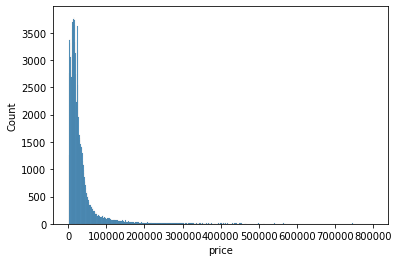

In [7]:
sns.histplot(df['price'])

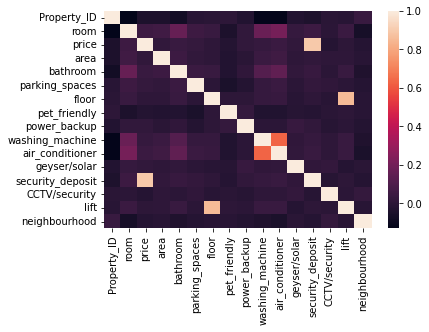

In [8]:
sns.heatmap(df.corr())

In [9]:
labelencoder = LabelEncoder()

In [10]:
for i in categorical:
    df[i]=labelencoder.fit_transform(df[i])

In [11]:
df.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,0,2,2336,33624,1312,0,2,2,1,1,1,0,0,1,0,302616,0,0,300
1,90879,1,0,0,1893,9655,1474,2,2,4,0,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,0,0,1329,23699,1837,1,2,5,0,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,0,0,621,6306,606,2,1,6,0,18,0,0,0,0,0,37836,0,1,300
4,185438,1,0,4,1397,12008,498,1,3,7,0,14,0,0,1,1,0,72048,0,1,0


In [12]:
X=df.drop(columns=['price','Property_ID'])
y=df[['price']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor()

In [15]:
preds=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, preds))
rms

27381.696720609958

In [17]:
test_df=pd.read_csv('test.csv')

In [18]:
for i in categorical:
    test_df[i]=labelencoder.fit_transform(test_df[i])

In [19]:
X_test2=test_df.drop(columns=['Property_ID','price'])

In [20]:
ans=model.predict(X_test2)

In [21]:
ans=pd.DataFrame(ans,columns=['price'])

In [22]:
ans.to_csv('ans.csv')